# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [7]:
from main import *
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

%load_ext memory_profiler
expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

f(a)

ModuleNotFoundError: No module named 'dill'

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

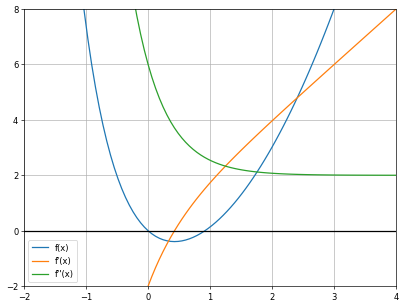

In [2]:
x1 = np.linspace(-2,4,100)
A = np.linspace(-2,4,100)
plt.figure(figsize=(8, 6), dpi=60)

plt.plot(x1,fun(x1),label='f(x)')
plt.plot(x1,dfun(x1),label= "f'(x)")
plt.plot(x1,ddfun(x1),label= "f''(x)")
plt.plot(x1,np.zeros(len(x1)),color='#000000')
plt.legend(loc=3)
plt.xlim(-2,4)
plt.ylim(-2,8)
plt.grid()
plt.show()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [14]:
from scipy.optimize import root, fsolve

result_root = root(fun,[0,1])
print(result_root.x)
result = fsolve(fun,[0,1])
print(result)

[0.         0.91656258]
[0.         0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Dla 5 iteracji wartość miejsca zerowego wynosi 0.91562500
29.7 µs ± 477 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 10 iteracji wartość miejsca zerowego wynosi 0.91630859
53.9 µs ± 283 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 25 iteracji wartość miejsca zerowego wynosi 0.91656256
139 µs ± 5.37 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 50 iteracji wartość miejsca zerowego wynosi 0.91656258
188 µs ± 10.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 100 iteracji wartość miejsca zerowego wynosi 0.91656258
185 µs ± 2.04 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 250 iteracji wartość miejsca zerowego wynosi 0.91656258
184 µs ± 5.18 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 500 iteracji wartość miejsca zerowego wynosi 0.91656258
188 µs ± 5.36 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)



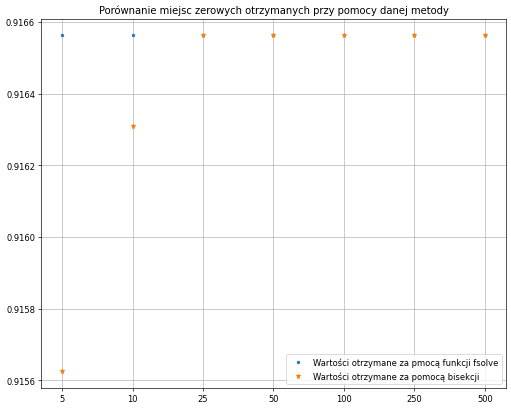

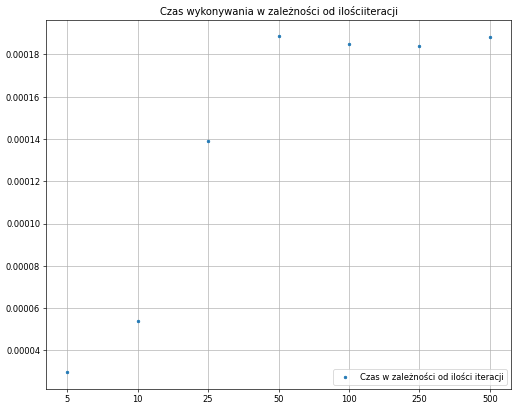

In [35]:
# bisekcja
time_bisection = []
result_bisection = []
iteracje = [5,10,25,50,100,250,500]

for i in iteracje:
    result_b = bisection(0.5,1.2,fun,10**(-10),i)
    print(f'Dla {i} iteracji wartość miejsca zerowego wynosi',"{:.8f}".format(result_b[0]))
    time_m = %timeit -r 5 -n 10 -o bisection(0.5,1.2,fun,10**(-10),i)
    time_bisection.append(time_m.average)
    result_bisection.append(result_b[0])
    print()

plt.figure(figsize=(10, 8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],[result[1]]* len(iteracje),'.')
plt.plot(['5','10','25','50','100','250','500'],result_bisection,'*')
plt.legend(['Wartości otrzymane za pmocą funkcji fsolve','Wartości otrzymane za pomocą bisekcji'])
plt.title("Porównanie miejsc zerowych otrzymanych przy pomocy danej metody")
plt.grid()
plt.show()

plt.figure(figsize=(10,8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],time_bisection,'.')
plt.title("Czas wykonywania w zależności od ilościiteracji")
plt.legend(["Czas w zależności od ilości iteracji"],loc=4)
plt.grid()
plt.show()

Dla 5 iteracji wartość miejsca zerowego wynosi 0.91652586
76.7 µs ± 19.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 10 iteracji wartość miejsca zerowego wynosi 0.91656257
117 µs ± 1.19 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 25 iteracji wartość miejsca zerowego wynosi 0.91656258
165 µs ± 5.21 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 50 iteracji wartość miejsca zerowego wynosi 0.91656258
167 µs ± 1.91 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 100 iteracji wartość miejsca zerowego wynosi 0.91656258
172 µs ± 6.45 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 250 iteracji wartość miejsca zerowego wynosi 0.91656258
164 µs ± 1.71 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 500 iteracji wartość miejsca zerowego wynosi 0.91656258
171 µs ± 18 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)



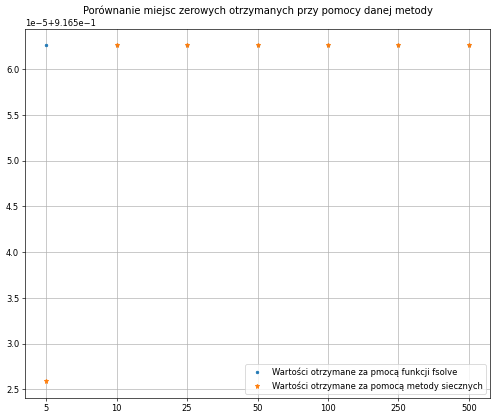

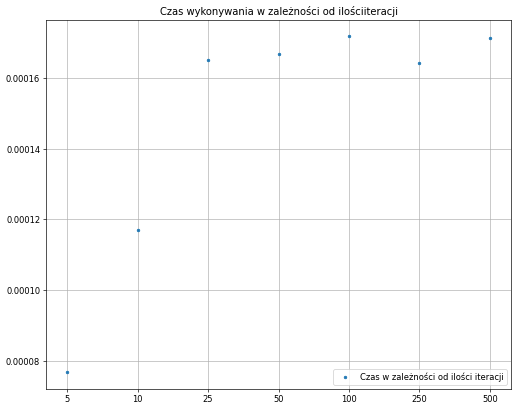

In [39]:
# meoda siecznych
iteracje = [5,10,25,50,100,250,500]
time_secant = []
result_secant = []

for i in iteracje:
    result_s = secant(0.5,1.2,fun,10**(-10),i)
    print(f'Dla {i} iteracji wartość miejsca zerowego wynosi',"{:.8f}".format(result_s[0]))
    time_m = %timeit -r 5 -n 10 -o secant(0.5,1.2,fun,10**(-10),i)
    time_secant.append(time_m.average)
    result_secant.append(result_s[0])
    print()

plt.figure(figsize=(10, 8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],[result[1]]* len(iteracje),'.')
plt.plot(['5','10','25','50','100','250','500'],result_secant,'*')
plt.legend(['Wartości otrzymane za pmocą funkcji fsolve','Wartości otrzymane za pomocą metody siecznych'])
plt.title("Porównanie miejsc zerowych otrzymanych przy pomocy danej metody")
plt.grid()
plt.show()

plt.figure(figsize=(10,8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],time_secant,'.')
plt.title("Czas wykonywania w zależności od ilościiteracji")
plt.legend(["Czas w zależności od ilości iteracji"],loc=4)
plt.grid()
plt.show()

Dla 5 iteracji wartość miejsca zerowego wynosi 0.91656564
24.2 µs ± 738 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 10 iteracji wartość miejsca zerowego wynosi 0.91656258
27.5 µs ± 545 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 25 iteracji wartość miejsca zerowego wynosi 0.91656258
27.6 µs ± 859 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 50 iteracji wartość miejsca zerowego wynosi 0.91656258
29.3 µs ± 1.21 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 100 iteracji wartość miejsca zerowego wynosi 0.91656258
27.4 µs ± 628 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 250 iteracji wartość miejsca zerowego wynosi 0.91656258
27.4 µs ± 511 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Dla 500 iteracji wartość miejsca zerowego wynosi 0.91656258
27.9 µs ± 1.68 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)



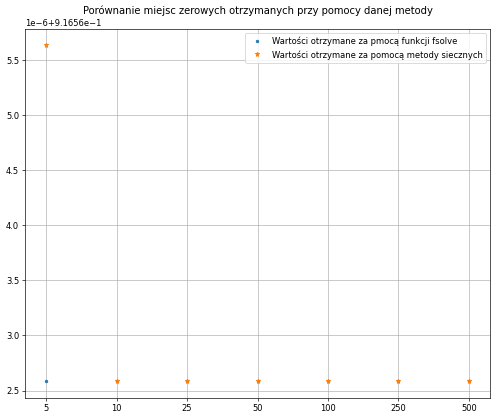

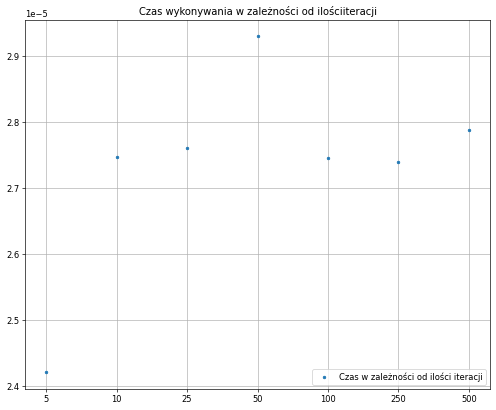

In [49]:
iteracje = [5,10,25,50,100,250,500]
time_newton = []
result_newton = []

for i in iteracje:
    result_n = newton(fun,dfun,ddfun,0.5,1.2,10**(-10),i)
    print(f'Dla {i} iteracji wartość miejsca zerowego wynosi',"{:.8f}".format(result_n[0]))
    time_m = %timeit -r 5 -n 10 -o newton(fun,dfun,ddfun,0.5,1.2,10**(-10),i)
    time_newton.append(time_m.average)
    result_newton.append(result_n[0])
    print()

plt.figure(figsize=(10, 8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],[result[1]]* len(iteracje),'.')
plt.plot(['5','10','25','50','100','250','500'],result_newton,'*')
plt.legend(['Wartości otrzymane za pmocą funkcji fsolve','Wartości otrzymane za pomocą metody siecznych'])
plt.title("Porównanie miejsc zerowych otrzymanych przy pomocy danej metody")
plt.grid()
plt.show()

plt.figure(figsize=(10,8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],time_newton,'.')
plt.title("Czas wykonywania w zależności od ilościiteracji")
plt.legend(["Czas w zależności od ilości iteracji"],loc=4)
plt.grid()
plt.show()

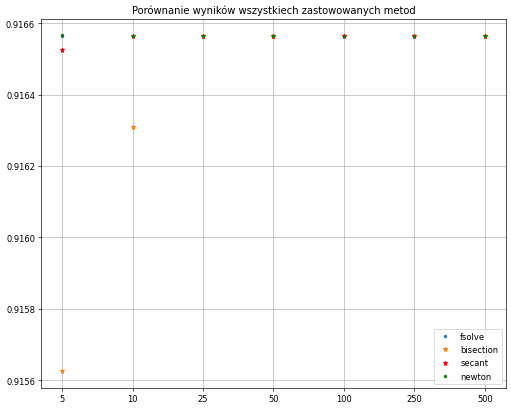

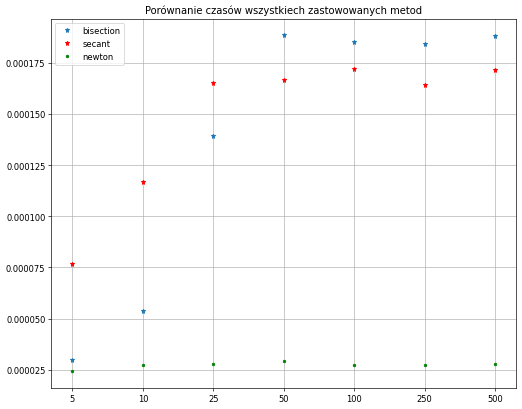

In [58]:
plt.figure(figsize=(10, 8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],[result[1]]* len(iteracje),'.')
plt.plot(['5','10','25','50','100','250','500'],result_bisection,'*')
plt.plot(['5','10','25','50','100','250','500'],result_secant,'r*')
plt.plot(['5','10','25','50','100','250','500'],result_newton,'g.')
plt.title("Porównanie wyników wszystkiech zastowowanych metod")
plt.legend(['fsolve','bisection','secant','newton'])
plt.grid()
plt.show()


plt.figure(figsize=(10, 8), dpi=60)
plt.plot(['5','10','25','50','100','250','500'],time_bisection,'*')
plt.plot(['5','10','25','50','100','250','500'],time_secant,'r*')
plt.plot(['5','10','25','50','100','250','500'],time_newton,'g.')
plt.title("Porównanie czasów wszystkiech zastowowanych metod")
plt.legend(['bisection','secant','newton'])
plt.grid()
plt.show()

WNIOSKI:
Na dzisiejszych zajęciach omawialiśmy metody iteracyjne rozwiązania równań nieliniowych. Poznaliśmy metody bisekcji, siecznych oraz metodę Newtona. Na zajęciach mieliśmy rozwiązać nasze zadania za pomocą zapoznanych metod. Okazało się, że wszytstkie metody są dosyć dokładnie jednak metoda bisekcji dla małej ilości iteracji staje się minimalnie mniej dokładne. Jeśli chodzi o czas to najszynsza okazuję się metod Newtona.